In [0]:
import pandas as pd 
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/mie1624/assignment2')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler as scaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn 
from sklearn import neighbors

import matplotlib
import matplotlib.pyplot as plt
import re

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

import nltk
nltk.download("stopwords")
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler as scaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn 
from sklearn import neighbors
import re

import nltk



from collections import Counter
from functools import reduce


!pip install wordcloud
from wordcloud import WordCloud

import html
import re
from scipy import stats
import random
random.seed()

!pip install nltk
import nltk
from nltk.tokenize import RegexpTokenizer


import nltk

from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report


import collections
from wordcloud import WordCloud

这边的人规矩到发twitter都会# 完了自动空格吗
或者我们对每一个单词之间的空格做split 然后删去含有# 之类的东西。
但是这样就会出现
my yuan is thief six 的情况

In [0]:
dfsel=pd.read_csv("Canadian_elections_2019.csv")
lines = pd.read_csv("stop_words.txt")
lines=lines['a'].tolist()
lines.append("a")

dfsen=pd.read_csv("Sentiment.csv")

In [0]:
def clean_file_text(file):
    
    wordlist = []
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatiser = WordNetLemmatizer()
    stemmer = LancasterStemmer()
    stopwords = lines


    for i in range(len(file)):
    # remove all URLs 
        new_file = re.sub(r"http\S+","", file[i])
    # remove html tags
        comp = re.compile('<.*?>')
        new_file = re.sub(comp, '', new_file)
    # replaced HTML characters with an ASCII equivalent
        new_file = html.unescape(new_file)
    
        new_file = re.sub('[^A-Za-z0-9 ]+', '', new_file)
        new_file = re.sub(r'[?|$|.|!|@|&]',r'',new_file)
        new_file = new_file.lower()

        file_words = [i for i in tokenizer.tokenize(new_file) if i not in stopwords]
       
        wordlist.append(file_words)
 
    return wordlist
#we cant add ps() in the function because we need to draw a word cloud 

## selection

In [0]:
iiilist=dfsel['text'].tolist()
for i in range(len(iiilist)):
  a=iiilist[i]
  a=str(a)
  iiilist[i]=a

for i in range(len(iiilist)):
  a=iiilist[i]
  a=a.lstrip("b")
  iiilist[i]=a

In [0]:
dfsel['cleantext']=clean_file_text(iiilist)
iiilist=dfsel['cleantext'].tolist()

In [0]:
listforselcloud=iiilist.copy()

In [0]:
ps = PorterStemmer()
for i in range(len(iiilist)):
  iiilist[i] = [ps.stem(word) for word in iiilist[i]] 

In [0]:
#output=[]
#for i in iiilist:
#  output.extend(i)

#dfformodel111=pd.DataFrame()
#dfformodel111['all']=output
#dfformodel111=pd.DataFrame(dfformodel111['all'].value_counts())
#usefulword=dfformodel111.loc[dfformodel111['all']>=50].index.tolist()

In [0]:
joining=" "

for i in range(len(iiilist)):
  a=joining.join(iiilist[i])
  iiilist[i]=a

dfsel['cleantext']=iiilist

##Sentiment

In [0]:
dfsen=dfsen.dropna()


In [0]:
iiilist=dfsen['text'].tolist()
for i in range(len(iiilist)):
  a=iiilist[i]
  a=str(a)
  iiilist[i]=a

for i in range(len(iiilist)):
  a=iiilist[i]
  a=a.lstrip("b")
  iiilist[i]=a

In [0]:
dfsen['cleantext']=clean_file_text(iiilist)
iiilist=dfsen['cleantext'].tolist()

In [0]:
listforsencloud=iiilist.copy()

In [0]:
ps = PorterStemmer()
for i in range(len(iiilist)):
  iiilist[i] = [ps.stem(word) for word in iiilist[i]] 

In [0]:
output=[]
for i in iiilist:
  output.extend(i)

dfformodel111=pd.DataFrame()
dfformodel111['all']=output
dfformodel111=pd.DataFrame(dfformodel111['all'].value_counts())
usefulword=dfformodel111.loc[dfformodel111['all']>=50].index.tolist()

we only pick up the word whose WF is higher than 50, due the risk of crash of the code. for the dataset concludes 130000 data points, even the word whose WF is lower than 50 have significant relationship with sentiment, it will be consider as an outliner due to very little sample number.
(why we choose 50 is that 50 is the min value we can aviod the crash happen( according to practical experiment, we still want to get as more information as possible.)

In [0]:
for i in range(len(iiilist)):
  iiilist[i]=[word for word in iiilist[i] if word in usefulword]

In [0]:
len(usefulword)

2076

In [0]:
joining=" "

for i in range(len(iiilist)):
  a=joining.join(iiilist[i])
  iiilist[i]=a

dfsen['cleantext']=iiilist

##explore for polictics party

In [0]:
dfsel

,sentiment,negative_reason,text,cleantext
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton suggest agre canadian women trust ...
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",allwomanspacewalk realnspacest netobicokenorth...
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford go cost 94 billion 4 year justin elx...
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",canada canadaelection2019 canadavot nelxn43 nn...
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpay sick tire hard earn donat corpor...
...,...,...,...,...
2128,Negative,Scandal,b'You know he was doing a good enough job smea...,good job smear campaign andrewsch cdnpoli elxn...
2129,Negative,Scandal,b'You missed the comment. Deflecting the issue...,miss comment deflect issu answer best respons ...
2130,Positive,NaN,b'Your daily reminder:\n@theJagmeetSingh endor...,daili remindernthejagmeetsingh endors strateg ...
2131,Negative,Women Reproductive right and Racism,b'Yup...not going to reopen the abortion debat...,yupnot go reopen abort debatexf0x9fx98x8fnelxn...


In [0]:
dfcount=pd.DataFrame(columns=['NPD','LIBER','GREEN','PPC','CPC','NONE'])
dfcount['ybyb']=dfsel['sentiment']

In [0]:
dfcount=dfcount.fillna(0)
dfcount=dfcount.iloc[:,:-1]

In [0]:

for i in range(len(dfsel['cleantext'].tolist())):
  a=dfsel['cleantext'].tolist()[i]
  dfcount.iloc[i,0]=a.count("voteforchang")+a.count("votendp")+a.count("ndp")+a.count("ndp")+a.count("ndp")+a.count("pro-ndp")+a.count("ndp2019")+a.count("jackharrisndp")+a.count("jaedendt_ndp")
  dfcount.iloc[i,1]=a.count("voteliber")+a.count("ivotedliber")+a.count("voteliberalstopthecon")+a.count("liber")+a.count("liberal_parti")+a.count("liberalparti")+a.count("liber")+a.count("liberal_parti")+a.count("liberal_parti")
  dfcount.iloc[i,2]=a.count("votegreen")+a.count("votekooy")+a.count("votegreen2019")
  dfcount.iloc[i,3]=a.count("voteppc2019")+a.count("voteforjo")+a.count("voteppc")+a.count("votetrudeauout2019")+a.count("cpacvote2019")+a.count("ppc")+a.count("northppc")+a.count("ppc2019")+a.count("ppcdbn")+a.count("ppc2019alltheway")+a.count("ppctilden")+a.count("ppc")
  dfcount.iloc[i,4]=a.count("votecpc")+a.count("votecarol")
  #dfcount.iloc[i,5]=len(a)-dfcount.iloc[i,4]-dfcount.iloc[i,3]-dfcount.iloc[i,2]-dfcount.iloc[i,1]-dfcount.iloc[i,0]

 



In [0]:
dfcount['NONE']=1
dfcount['class']=0

dfcount['class']=dfcount.idxmax(axis=1)


In [0]:
dfcount1=dfcount.copy()

Text(0.5, 1.0, 'NDPtrue')

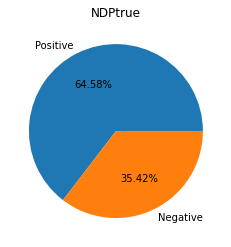

In [0]:
dfsel['class']=dfcount['class'].tolist()
#NDP
true_V=dfsel.loc[dfsel['class']=='NPD']['sentiment'].value_counts().tolist()
label=dfsel.loc[dfsel['class']=='NPD']['sentiment'].value_counts().index.tolist()
plt.pie(true_V,labels=label,autopct='%1.2f%%')
plt.title('NDPtrue')


Text(0.5, 1.0, 'LIBERtrue')

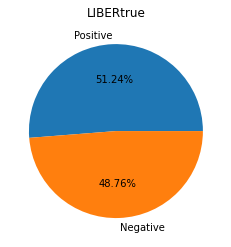

In [0]:
#LIBER
true_V=dfsel.loc[dfsel['class']=='LIBER']['sentiment'].value_counts().tolist()
label=dfsel.loc[dfsel['class']=='LIBER']['sentiment'].value_counts().index.tolist()
plt.pie(true_V,labels=label,autopct='%1.2f%%')
plt.title('LIBERtrue')


Text(0.5, 1.0, 'PPCtrue')

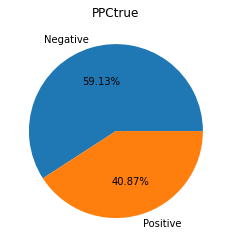

In [0]:
#PPC
true_V=dfsel.loc[dfsel['class']=='PPC']['sentiment'].value_counts().tolist()
label=dfsel.loc[dfsel['class']=='PPC']['sentiment'].value_counts().index.tolist()
plt.pie(true_V,labels=label,autopct='%1.2f%%')
plt.title('PPCtrue')


Text(0.5, 1.0, 'NONEtrue')

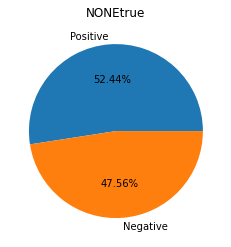

In [0]:
#NONE
true_V=dfsel.loc[dfsel['class']=='NONE']['sentiment'].value_counts().tolist()
label=dfsel.loc[dfsel['class']=='NONE']['sentiment'].value_counts().index.tolist()
plt.pie(true_V,labels=label,autopct='%1.2f%%')
plt.title('NONEtrue')

Classes like none and LIBER have positive around 55% while 45% negative, but for the NDP and PPC, there are 65%positive which means in public eyes, these 2 parties have a better reputation.

In [0]:
dfcount=pd.DataFrame(dfcount['class'].value_counts())
dfcount

,class
NONE,1617
LIBER,201
NPD,192
PPC,115
GREEN,6
CPC,2


Text(0, 0.5, 'number')

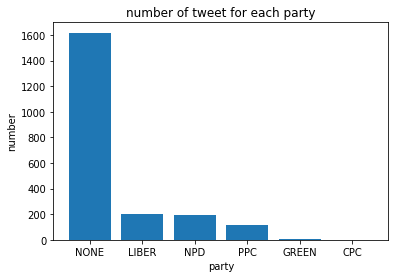

In [0]:
plt.bar(dfcount.index,dfcount['class'])
plt.title('number of tweet for each party')
plt.xlabel("party")
plt.ylabel("number")

"NONE" is dominating because most of the tweet is like "#vote for animal""student vote " which is not exactly refer to political party.
so we remove the "none cals and take a closer look"

Text(0, 0.5, 'number')

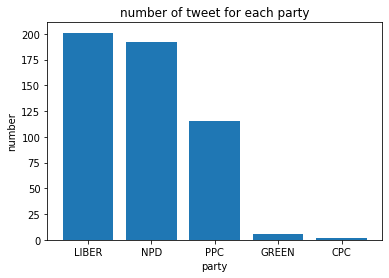

In [0]:
plt.bar(dfcount.index.tolist()[1:],dfcount['class'].tolist()[1:])
plt.title('number of tweet for each party')
plt.xlabel("party")
plt.ylabel("number")

as we can see in the fig, the bigger the party the more tweet about it. like NDP abd LIBER, the tweet about them is 2 times than others.

In [0]:
dfsencount=pd.DataFrame()

In [0]:
lenlist=[]
a=dfsen['cleantext'].tolist()

for i in range(len(a)):
  lenlist.append(len(str(a[i]).split(' ')))

In [0]:
dfsencount['len']=lenlist
dfsencount['target']=dfsen['sentiment']
dfsencount

,len,target
0,8,Positive
1,6,Negative
2,2,Positive
3,7,Positive
4,4,Positive
...,...,...
133792,4,Negative
133793,4,Negative
133794,4,Negative
133795,4,Negative


Text(0, 0.5, 'number')

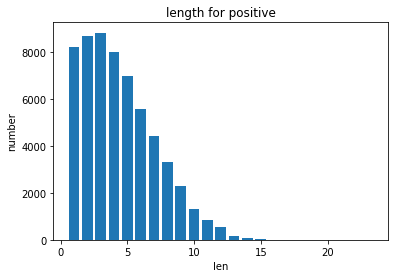

In [0]:
df1=pd.DataFrame((dfsencount.loc[dfsencount['target']=='Positive'])['len'].value_counts())
plt.bar(df1.index.tolist(),df1['len'])
plt.title('length for positive')
plt.xlabel("len")
plt.ylabel("number")

Text(0, 0.5, 'number')

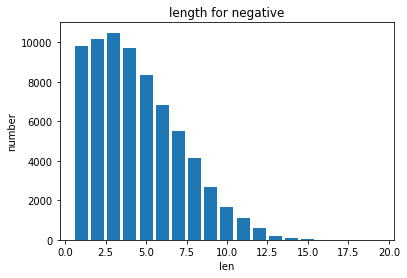

In [0]:
df2=pd.DataFrame((dfsencount.loc[dfsencount['target']=='Negative'])['len'].value_counts())
plt.bar(df2.index.tolist(),df2['len'])
plt.title('length for negative')
plt.xlabel("len")
plt.ylabel("number")

Text(0, 0.5, 'number')

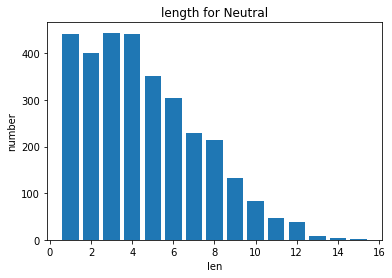

In [0]:
df3=pd.DataFrame((dfsencount.loc[dfsencount['target']=='Neutral'])['len'].value_counts())
plt.bar(df3.index.tolist(),df3['len'])
plt.title('length for Neutral')
plt.xlabel("len")
plt.ylabel("number")

as we can see above, the distribution of negetive and postive tweets' lenth is the same. So length does not affect the nagetive or positive.

##explore for word cloud 

In [0]:
listforselcloud = [y for x in listforselcloud for y in x]


In [0]:
joining=" "
listforselcloud=joining.join(listforselcloud)


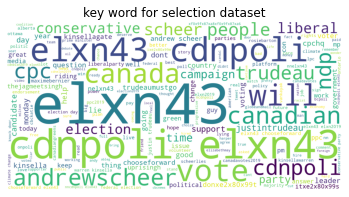

In [0]:
wordcloud = WordCloud(background_color="white",width=2000, height=1000, margin=2).generate(listforselcloud)

plt.imshow(wordcloud)
plt.title('key word for selection dataset')
plt.axis("off")
plt.show()

In [0]:
listforsencloud = [y for x in listforsencloud for y in x]
joining=" "
listforsencloud=joining.join(listforsencloud)


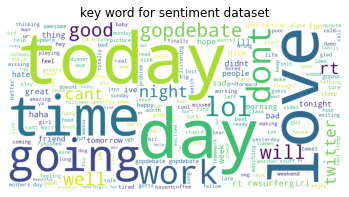

In [0]:

wordcloud = WordCloud(background_color="white",width=2000, height=1000, margin=2).generate(listforsencloud)
plt.title('key word for sentiment dataset')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



# WF modeling

In [0]:
vectorizer = CountVectorizer()
array_WF = vectorizer.fit_transform(dfsen['cleantext']).toarray()
dfsentiment=pd.DataFrame(array_WF)
dfsentiment['target']=dfsen['sentiment'].tolist()

there is too much data point in the set in order to run the code without any crash and training the model with CV we choose 10000 data points to represents all the data set. This process will cause some noise to the whole model because we just choose 10% information to train the data. However due to the extermely large datapoint, 10000 can contains the information we want to train the model, we will see the result of these model, if the acc is lower than 50 we will increase the amount of sample we choose to train the model.

In [0]:
dftrain=dfsentiment.sample(10000)
#dftrain=dfsentiment.sample(20000)
#dftrain=dfsentiment.sample(50000)

In [0]:
X_train , X_test, y_train, y_test = train_test_split(dftrain.iloc[:,:-1], dftrain.iloc[:,-1], test_size=0.3, random_state=0)


knn

for knn and SVM we use a sub set due to the low running speed and for other algrithm we choose to use cross validation to find the best hyprameter.

In [0]:
knn=neighbors.KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)
accuracy=accuracy_score(y_train,knn.predict(X_train))
accuracy

0.4835714285714286

1
10
20
50
100
200
300
500
1000


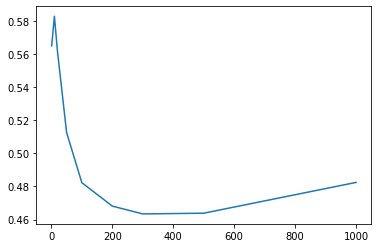

In [0]:
from sklearn.model_selection import cross_val_score
accuracylist=[]
for i in [1,10,20,50,100,200,300,500,1000]:
  knn=neighbors.KNeighborsClassifier(n_neighbors=i)
  scores1=cross_val_score(knn,X_train,y_train,cv=10)
  accuracy=scores1.mean()
  accuracylist.append(accuracy)
  print(i)
ilist=[1,10,20,50,100,200,300,500,1000]
plt.plot(ilist,accuracylist)

In [0]:
i
accuracylist

[0.5648571428571428,
 0.5827142857142856,
 0.5615714285714286,
 0.5125714285714287,
 0.4822857142857142,
 0.4681428571428571,
 0.46342857142857136,
 0.46385714285714286,
 0.4824285714285714]

In [0]:
knn=neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_test,y_test)
accuracy=accuracy_score(y_test,knn.predict(X_test))
accuracy

0.6556666666666666

logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
accuracy=accuracy_score(y_train,clf.predict(X_train))
#it is overfitting but we just wanna see it can run or not 

In [0]:
accuracy

0.8181428571428572

In [0]:
from sklearn.model_selection import cross_val_score

solverlist=['liblinear','lbfgs','newton-cg','sag']
clist=[0.01,0.05,0.1,0.5,1]
sollist=[]
penlist=[]
accuracylist=[]
for m in solverlist:
  for n in clist:
    clf = LogisticRegression(C=n,solver=m,max_iter=1000)
    scores1=cross_val_score(clf,X_train,y_train,cv=5)
    accuracy=scores1.mean()
    sollist.append(m)
    penlist.append(n)
    accuracylist.append(accuracy)
    print(m,n)

liblinear 0.01
liblinear 0.05
liblinear 0.1
liblinear 0.5
liblinear 1
lbfgs 0.01
lbfgs 0.05
lbfgs 0.1
lbfgs 0.5
lbfgs 1
newton-cg 0.01
newton-cg 0.05
newton-cg 0.1
newton-cg 0.5
newton-cg 1
sag 0.01
sag 0.05
sag 0.1
sag 0.5
sag 1


In [0]:
accuracylist.index(max(accuracylist))

7

In [0]:
print(max(accuracylist))
print(penlist[accuracylist.index(max(accuracylist))])
print(sollist[accuracylist.index(max(accuracylist))])

0.6861428571428572
0.1
lbfgs


In [0]:

clf = LogisticRegression(C=0.1,solver='lbfgs',max_iter=1000)
clf.fit(X_train, y_train)
accuracy=accuracy_score(y_test,clf.predict(X_test))
accuracy

0.695

naive byes

In [0]:
from sklearn.naive_bayes import MultinomialNB


In [0]:
accuracylist=[]
for i in [1,10,20,50,100]:
  clf = MultinomialNB(alpha=i/100)
  scores1=cross_val_score(clf,X_train,y_train,cv=10)
  accuracyscore=scores1.mean()
  accuracylist.append(accuracyscore)
  print(i)

1
10
20
50
100


In [0]:
accuracylist.index(max(accuracylist))

4

In [0]:
max(accuracylist)

0.671142857142857

In [0]:
clf = MultinomialNB(alpha=100/100)
clf.fit(X_train, y_train)
accuracy=accuracy_score(y_test,clf.predict(X_test))
accuracy

0.667

svm

In [0]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_train)
accuracyscore=accuracy_score(y_pred,y_train)
accuracyscore
#it is overfitting but we just wanna see it can run or not 

0.5358571428571428

In [0]:
from sklearn.model_selection import cross_val_score
Clist=[1, 2, 4]
gammalist=[0.125, 0.25, 0.5 ,1, 2, 4,'auto'] 
clist=[]
accuracylist=[]
gammmalist=[]
for m in Clist:
  for n in gammalist:
    clf = SVC(gamma=n,C=m)
    scores1=cross_val_score(clf,X_train,y_train,cv=10)
    accuracyscore=scores1.mean()
    accuracylist.append(accuracyscore)
    clist.append(m)
    gammmalist.append(n)
    print(m,n)

1 0.125
1 0.25
1 0.5
1 1
1 2
1 4
1 auto
2 0.125
2 0.25
2 0.5
2 1
2 2
2 4
2 auto
4 0.125
4 0.25
4 0.5
4 1
4 2
4 4
4 auto


In [0]:
print(max(accuracylist))
print(gammmalist[accuracylist.index(max(accuracylist))])
print(clist[accuracylist.index(max(accuracylist))])

0.6891428571428573
0.25
1


In [0]:
from sklearn.svm import SVC
clf = SVC(gamma=0.25,C=1)
clf.fit(X_train, y_train)
accuracy=accuracy_score(y_test,clf.predict(X_test))

In [0]:
accuracy

0.6786666666666666

desicion tree

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_train)
accuracyscore=accuracy_score(y_pred,y_train)

In [0]:
accuracyscore
#of course it is overfitting

0.9678571428571429

In [0]:
criterionlist=['gini','entropy']
max_depthlist=[None,10,25,50,75,100]
crilist=[]
maxlist=[]
accuracylist=[]
for n in criterionlist:
  for m in max_depthlist:
    clf = tree.DecisionTreeClassifier(criterion=n,max_depth=m)
    scores1=cross_val_score(clf,X_train,y_train,cv=10)
    accuracyscore=scores1.mean()
    crilist.append(n)
    maxlist.append(m)
    accuracylist.append(accuracyscore)
    print(m,n)

None gini
10 gini
25 gini
50 gini
75 gini
100 gini
None entropy
10 entropy
25 entropy
50 entropy
75 entropy
100 entropy


In [0]:
print(max(accuracylist))
accuracylist.index(max(accuracylist))

0.6302857142857141


5

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracyscore=accuracy_score(y_pred,y_test)

In [0]:
accuracy

0.667

random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import  metrics

rf0 = RandomForestClassifier(oob_score=True, random_state=12)
rf0.fit(X_train,y_train)
print (rf0.oob_score_)
y_pred = rf0.predict(X_train)
accuracyscore=accuracy_score(y_pred,y_train)
accuracyscore
#it is overfitting but we just wanna see it can run or not 

0.6612857142857143


0.9678571428571429

In [0]:
depthlist=[10,20,30,40,50,60,70,80,90,100]
estimatorslist=[25,50,75,100,125,150,200,300]
accuracylist=[]
for m in depthlist:
  for n in estimatorslist:
    rf0 = RandomForestClassifier(oob_score=True, random_state=12,max_depth=m,n_estimators=n)
    scores1=cross_val_score(rf0,X_train,y_train,cv=10)
    accuracyscore=scores1.mean()
    accuracylist.append(accuracyscore)
    print(m,n)

In [0]:
print(max(accuracylist))
accuracylist.index(max(accuracylist))

0.6867142857142856


47

In [0]:

rf0 = RandomForestClassifier(oob_score=True, random_state=12,max_depth=60,n_estimators=300)
rf0.fit(X_train,y_train)
print (rf0.oob_score_)
y_pred = rf0.predict(X_test)
accuracyscore=accuracy_score(y_pred,y_test)
accuracyscore

0.6862857142857143


0.6893333333333334

XGboost

In [0]:
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
from xgboost.sklearn import XGBClassifier

clf = XGBClassifier(learning_rate= 0.3,max_depth=6,n_estimators=100)
clf.fit(X_train, y_train,eval_metric='auc',verbose=False)
accuracyscore=accuracy_score(clf.predict(X_train),y_train)
accuracyscore
#of course it is overfitting


0.8385714285714285

In [0]:
LRlist=[0.3,0.5,0.7]
depthlist=[3,5,7,10]
pralist=[]
accuracylist=[]
for a in LRlist:
  for b in depthlist:
   clf = XGBClassifier(learning_rate= a,max_depth=b,n_estimators=100)
   scores1=cross_val_score(clf,X_train,y_train,cv=10)
   accuracyscore=scores1.mean()
   pralist.append(a)
   pralist.append(b)  
   accuracylist.append(accuracyscore)
   print(a,b)

0.3 3
0.3 5
0.3 7
0.3 10
0.5 3
0.5 5
0.5 7
0.5 10
0.7 3
0.7 5
0.7 7
0.7 10


In [0]:
print(max(accuracylist))
accuracylist.index(max(accuracylist))

0.6171428571428571


11

In [0]:
clf = XGBClassifier(learning_rate= 0.7,max_depth=10,n_estimators=100)
clf.fit(X_train, y_train,eval_metric='auc',verbose=False)
accuracyscore=accuracy_score(clf.predict(X_test),y_test)
accuracyscore

0.57

#TF-IDF modeling

In [0]:
vectorizer3 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
array_TFIDF = vectorizer3.fit_transform(dfsen['cleantext']).toarray()

In [0]:
dfsentiment1=pd.DataFrame(array_TFIDF)
dfsentiment=pd.DataFrame(array_TFIDF)
dfsentiment['target']=dfsen['sentiment'].tolist()

In [0]:
dftrain1=dfsentiment.sample(10000)
#dftrain1=dfsentiment.sample(20000)
#dftrain1=dfsentiment.sample(50000)
X_train1 , X_test1, y_train1, y_test1 = train_test_split(dftrain1.iloc[:,:-1], dftrain1.iloc[:,-1], test_size=0.3, random_state=0)

Knn

In [0]:
knn=neighbors.KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train1,y_train1)
accuracy=accuracy_score(y_train1,knn.predict(X_train1))
accuracy
#should be overfitting

0.5031428571428571

1
10
20
50
100
200
300
500
1000


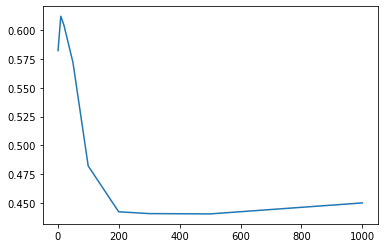

In [0]:
from sklearn.model_selection import cross_val_score
accuracylist=[]
for i in [1,10,20,50,100,200,300,500,1000]:
  knn=neighbors.KNeighborsClassifier(n_neighbors=i)
  scores1=cross_val_score(knn,X_train1,y_train1,cv=10)
  accuracy=scores1.mean()
  accuracylist.append(accuracy)
  print(i)

ilist=[1,10,20,50,100,200,300,500,1000]
plt.plot(ilist,accuracylist)

In [0]:
knn=neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_test1,y_test1)
accuracy=accuracy_score(y_test1,knn.predict(X_test1))
accuracy

0.6573333333333333

logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train1, y_train1)
accuracy=accuracy_score(y_train1,clf.predict(X_train1))
accuracy
#it is overfitting but we just wanna see it can run or not 

0.6506666666666666

In [0]:
solverlist=['liblinear','lbfgs','newton-cg','sag']
clist=[0.01,0.05,0.1,0.5,1]
sollist=[]
penlist=[]
accuracylist=[]
for m in solverlist:
  for n in clist:
    clf = LogisticRegression(C=n,solver=m,max_iter=1000)
    scores1=cross_val_score(clf,X_train1,y_train1,cv=10)
    accuracy=scores1.mean()
    sollist.append(m)
    penlist.append(n)
    accuracylist.append(accuracy)
    print(m,n)

liblinear 0.01
liblinear 0.05
liblinear 0.1
liblinear 0.5
liblinear 1
lbfgs 0.01
lbfgs 0.05
lbfgs 0.1
lbfgs 0.5
lbfgs 1
newton-cg 0.01
newton-cg 0.05
newton-cg 0.1
newton-cg 0.5
newton-cg 1
sag 0.01
sag 0.05
sag 0.1
sag 0.5
sag 1


In [0]:
print(max(accuracylist))
print(penlist[accuracylist.index(max(accuracylist))])
print(sollist[accuracylist.index(max(accuracylist))])

0.6872857142857143
0.01
liblinear


In [0]:
clf = LogisticRegression(C=0.01,solver='liblinear',max_iter=1000)
clf.fit(X_train1, y_train1)
accuracy=accuracy_score(y_test1,clf.predict(X_test1))
accuracy

0.6846666666666666

naive byes

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train1, y_train1)
MultinomialNB()
y_pred=clf.predict(X_train1)
accuracyscore=accuracy_score(y_pred,y_train1)
accuracyscore
#it is overfitting but we just wanna see it can run or not 

0.7341428571428571

In [0]:
accuracylist=[]
for i in [1,2,5,10,20,50,100]:
  clf = MultinomialNB(alpha=i/100)
  scores1=cross_val_score(clf,X_train1,y_train1,cv=10)
  accuracyscore=scores1.mean()
  accuracylist.append(accuracyscore)
  print(i)

1
2
5
10
20
50
100


In [0]:
print(accuracylist.index(max(accuracylist)))
max(accuracylist)

0


0.6392857142857142

In [0]:
clf = MultinomialNB(alpha=1/100)
clf.fit(X_train1, y_train1)
MultinomialNB()
y_pred=clf.predict(X_test1)
accuracyscore=accuracy_score(y_pred,y_test1)
accuracyscore

0.6463333333333333

svm

In [0]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train1, y_train1)
y_pred=clf.predict(X_train1)
accuracyscore=accuracy_score(y_pred,y_train1)
accuracyscore
#it is overfitting but we just wanna see it can run or not 

0.7388571428571429

In [0]:
from sklearn.model_selection import cross_val_score

Clist=[1, 2, 4]
gammalist=[0.125, 0.25, 0.5 ,1, 2, 4,'auto'] 
clist=[]
accuracylist=[]
gammmalist=[]
for m in Clist:
  for n in gammalist:
    clf = SVC(gamma=n,C=m)
    scores1=cross_val_score(clf,X_train1,y_train1,cv=10)
    accuracyscore=scores1.mean()
    accuracylist.append(accuracyscore)
    clist.append(m)
    gammmalist.append(n)
    print(m,n)


1 0.125
1 0.25
1 0.5
1 1
1 2
1 4
1 auto
2 0.125
2 0.25
2 0.5
2 1
2 2
2 4
2 auto
4 0.125
4 0.25
4 0.5
4 1
4 2
4 4
4 auto


In [0]:
print(max(accuracylist))
print(gammmalist[accuracylist.index(max(accuracylist))])
print(clist[accuracylist.index(max(accuracylist))])


0.6414285714285713
auto
4


In [0]:
n=gammmalist[accuracylist.index(max(accuracylist))]
m=clist[accuracylist.index(max(accuracylist))]
clf = SVC(gamma=n,C=m)
clf.fit(X_train1, y_train1)
accuracy=accuracy_score(y_test1,clf.predict(X_test1))
accuracy

0.6166666666666667

decision tree

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train1,y_train1)
y_pred=clf.predict(X_train1)
accuracyscore=accuracy_score(y_pred,y_train1)

In [0]:
accuracyscore
#it is overfitting but we just wanna see it can run or not 

0.9684285714285714

In [0]:
criterionlist=['gini','entropy']
max_depthlist=[None,10,25,50,75,100]
crilist=[]
maxlist=[]
accuracylist=[]
for n in criterionlist:
  for m in max_depthlist:
    clf = tree.DecisionTreeClassifier(criterion=n,max_depth=m)
    scores1=cross_val_score(clf,X_train1,y_train1,cv=10)
    accuracyscore=scores1.mean()
    crilist.append(n)
    maxlist.append(m)
    accuracylist.append(accuracyscore)
    print(m,n)

None gini
10 gini
25 gini
50 gini
75 gini
100 gini
None entropy
10 entropy
25 entropy
50 entropy
75 entropy
100 entropy


In [0]:
print(accuracylist.index(max(accuracylist)))
max(accuracylist)

6


0.635

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=None)
clf.fit(X_train1,y_train1)
y_pred=clf.predict(X_test1)
accuracyscore=accuracy_score(y_pred,y_test1)

In [0]:
accuracyscore

0.6296666666666667

random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import  metrics

rf0 = RandomForestClassifier(oob_score=True, random_state=12)
rf0.fit(X_train1,y_train1)
print (rf0.oob_score_)
y_pred = rf0.predict(X_train1)
accuracyscore=accuracy_score(y_pred,y_train1)
accuracyscore
#it is overfitting but we just wanna see it can run or not 

0.6685714285714286


0.6656666666666666

In [0]:
depthlist=[10,20,30,40,50,60,70,80,90,100]
estimatorslist=[25,50,75,100,125,150,200,300]
accuracylist=[]
mlist=[]
nlist=[]
for m in depthlist:
  for n in estimatorslist:
    rf0 = RandomForestClassifier(oob_score=True, random_state=12,max_depth=m,n_estimators=n)
    scores1=cross_val_score(rf0,X_train1,y_train1,cv=10)
    accuracyscore=scores1.mean()
    accuracylist.append(accuracyscore)
    mlist.append(m)
    nlist.append(n)
    print(m,n)

10 25
10 50
10 75
10 100
10 125
10 150
10 200
10 300
20 25
20 50
20 75
20 100
20 125
20 150
20 200
20 300
30 25
30 50
30 75
30 100
30 125
30 150
30 200
30 300
40 25
40 50
40 75
40 100
40 125
40 150
40 200
40 300
50 25
50 50
50 75
50 100
50 125
50 150
50 200
50 300
60 25
60 50
60 75
60 100
60 125
60 150
60 200
60 300
70 25
70 50
70 75
70 100
70 125
70 150
70 200
70 300
80 25
80 50
80 75
80 100
80 125
80 150
80 200
80 300
90 25
90 50
90 75
90 100
90 125
90 150
90 200
90 300
100 25
100 50
100 75
100 100
100 125
100 150
100 200
100 300


In [0]:

m=mlist[accuracylist.index(max(accuracylist))]
n=nlist[accuracylist.index(max(accuracylist))]
max(accuracylist)


0.6838571428571428

In [0]:
rf0 = RandomForestClassifier(oob_score=True, random_state=12,max_depth=m,n_estimators=n)
rf0.fit(X_train1,y_train1)
print (rf0.oob_score_)
y_pred = rf0.predict(X_test1)
accuracyscore=accuracy_score(y_pred,y_test1)
accuracyscore

0.6831428571428572


0.6743333333333333

XGboost

In [0]:
clf = XGBClassifier(learning_rate= 0.3,max_depth=6,n_estimators=100)
clf.fit(X_train1, y_train1,eval_metric='auc',verbose=False)
accuracyscore=accuracy_score(clf.predict(X_train1),y_train1)
accuracyscore
#of course it is overfitting



0.8357142857142857

In [0]:
LRlist=[0.3,0.5,0.7]
depthlist=[3,5,7,10]
pralist=[]
accuracylist=[]
for a in LRlist:
  for b in depthlist:
   clf = XGBClassifier(learning_rate= a,max_depth=b,n_estimators=100)
   scores1=cross_val_score(clf,X_train1,y_train1,cv=10)
   accuracyscore=scores1.mean()
   pralist.append(a)
   pralist.append(b)  
   accuracylist.append(accuracyscore)
   print(a,b)


0.3 3
0.3 5
0.3 7
0.3 10
0.5 3
0.5 5
0.5 7
0.5 10
0.7 3
0.7 5
0.7 7
0.7 10


In [0]:
print(max(accuracylist))
accuracylist.index(max(accuracylist))

0.6114285714285714


5

In [0]:
clf = XGBClassifier(learning_rate= 0.3,max_depth=6,n_estimators=100)
clf.fit(X_train1, y_train1,eval_metric='auc',verbose=False)
accuracyscore=accuracy_score(clf.predict(X_test1),y_test1)
accuracyscore

0.66

LR with WF does the best job so we choose this model to do the next step.

#selection dataset predict and distribution

now we try it on the canada selection data.

In [0]:
array_WF = vectorizer.transform(dfsel['cleantext']).toarray()
dfseltiment=pd.DataFrame(array_WF)
dfseltiment['target']=dfsel['sentiment'].tolist()

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000,C=0.1,solver='lbfgs')
clf.fit(X_train, y_train)
accuracy=accuracy_score(dfsel['sentiment'].tolist(),clf.predict(array_WF))

In [0]:
accuracy

0.60056258790436

In [0]:
dfcount1['ture']=dfsel['sentiment']
dfcount1['predict']=clf.predict(array_WF)
dfcount1=dfcount1.iloc[:,-3:]
dfcount1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


Text(0.5, 1.0, 'pred')

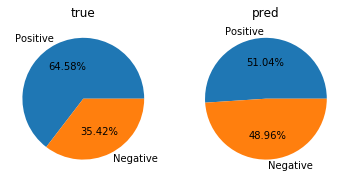

In [0]:
#NDP
true_V=dfcount1.loc[dfcount1['class']=='NPD']['ture'].value_counts().tolist()
label=dfcount1.loc[dfcount1['class']=='NPD']['ture'].value_counts().index.tolist()
pred_V=dfcount1.loc[dfcount1['class']=='NPD']['predict'].value_counts().tolist()
plt.subplot(121)
plt.pie(true_V,labels=label,autopct='%1.2f%%')
plt.subplot(121).set_title('true')
plt.subplot(122) 
plt.pie(pred_V,labels=label,autopct='%1.2f%%') 
plt.subplot(122).set_title('pred')

In [0]:
dfcount1['class'].unique()

array(['NONE', 'PPC', 'NPD', 'LIBER', 'GREEN', 'CPC'], dtype=object)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


Text(0.5, 1.0, 'pred')

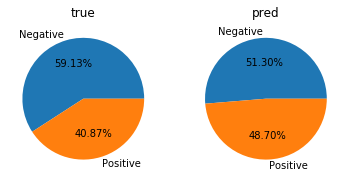

In [0]:
#CPC
true_V=dfcount1.loc[dfcount1['class']=='PPC']['ture'].value_counts().tolist()
label=dfcount1.loc[dfcount1['class']=='PPC']['ture'].value_counts().index.tolist()
pred_V=dfcount1.loc[dfcount1['class']=='PPC']['predict'].value_counts().tolist()
plt.subplot(121)
plt.pie(true_V,labels=label,autopct='%1.2f%%')
plt.subplot(121).set_title('true')
plt.subplot(122) 
plt.pie(pred_V,labels=label,autopct='%1.2f%%') 
plt.subplot(122).set_title('pred')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


Text(0.5, 1.0, 'pred')

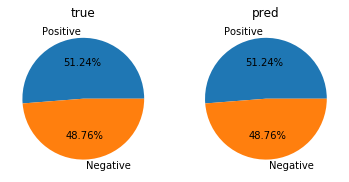

In [0]:
#LIBER
true_V=dfcount1.loc[dfcount1['class']=='LIBER']['ture'].value_counts().tolist()
label=dfcount1.loc[dfcount1['class']=='LIBER']['ture'].value_counts().index.tolist()
pred_V=dfcount1.loc[dfcount1['class']=='LIBER']['predict'].value_counts().tolist()
plt.subplot(121)
plt.pie(true_V,labels=label,autopct='%1.2f%%')
plt.subplot(121).set_title('true')
plt.subplot(122) 
plt.pie(pred_V,labels=label,autopct='%1.2f%%') 
plt.subplot(122).set_title('pred')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


Text(0.5, 1.0, 'pred')

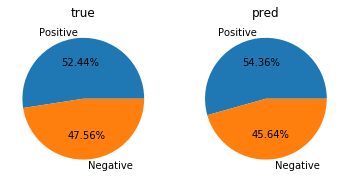

In [0]:
#NONE
true_V=dfcount1.loc[dfcount1['class']=='NONE']['ture'].value_counts().tolist()
label=dfcount1.loc[dfcount1['class']=='NONE']['ture'].value_counts().index.tolist()
pred_V=dfcount1.loc[dfcount1['class']=='NONE']['predict'].value_counts().tolist()
plt.subplot(121)
plt.pie(true_V,labels=label,autopct='%1.2f%%')
plt.subplot(121).set_title('true')
plt.subplot(122) 
plt.pie(pred_V,labels=label,autopct='%1.2f%%') 
plt.subplot(122).set_title('pred')

NLP to predict the twitter


the accuracy is just 60% on selection set and to avoid crash we drop the word whose frequency is lower than 50. Which cause lose some important information(like goooooooooooal, It can be 100% positive but we drop it. So if we use NLP analytics based on tweets can somehow predict the result but it can't be quiet useful because language is really unpredictable and will cause to much noise for the model (even we use stem)

#nagetive reason prediction 

In [0]:
dfselsub=dfsel.loc[dfsel['sentiment']=='Negative']

In [0]:
dfselsub['negative_reason'].unique()

array(['Women Reproductive right and Racism', 'Economy', 'Others',
       'Scandal', 'Tell lies', 'Privilege', 'Climate Problem',
       'Healthcare', 'Separation', 'Healthcare and Marijuana'],
      dtype=object)

In [0]:
array_WF = vectorizer.transform(dfselsub['cleantext']).toarray()
dfseltiment=pd.DataFrame(array_WF)
dfseltiment['target']=dfselsub['negative_reason'].tolist()


In [0]:
dfseltiment['target'].unique()

array(['Women Reproductive right and Racism', 'Economy', 'Others',
       'Scandal', 'Tell lies', 'Privilege', 'Climate Problem',
       'Healthcare', 'Separation', 'Healthcare and Marijuana'],
      dtype=object)

for the reason first of all we put health care and marijuana together due to the reason is same while the sample of them is too less.

In [0]:
dictneg={'Others':'Others',
 'Climate Problem':'Climate Problem',
 'Scandal':'Scandal',
 'Tell lies':'Tell lies',
 'Women Reproductive right and Racism':'Women Reproductive right and Racism',
 'Separation':'Separation',
 'Privilege':'Privilege',
 'Economy':'Economy',
 'Healthcare and Marijuana':'Healthcare',
 'Healthcare':'Healthcare'}

In [0]:
dfseltiment['target']=dfseltiment['target'].map(dictneg)
dfseltiment['target'].unique()

array(['Women Reproductive right and Racism', 'Economy', 'Others',
       'Scandal', 'Tell lies', 'Privilege', 'Climate Problem',
       'Healthcare', 'Separation'], dtype=object)

In [0]:
dfseltiment['target'].value_counts()

Others                                 364
Scandal                                270
Tell lies                              198
Economy                                 51
Women Reproductive right and Racism     45
Climate Problem                         41
Separation                              16
Privilege                               12
Healthcare                               9
Name: target, dtype: int64

we just conclude the last 6 classes into 1 class due to the little sample number of them. After doing that we have 4 huge class : Others, Scandal, Tell lies and minority reason

In [0]:
dictneg1={'Others':'Others',
 'Climate Problem':' minority reason',
 'Scandal':'Scandal',
 'Tell lies':'Tell lies',
 'Women Reproductive right and Racism':' minority reason',
 'Separation':' minority reason',
 'Privilege':' minority reason',
 'Economy':' minority reason',
 'Healthcare and Marijuana':' minority reason',
 'Healthcare':' minority reason'}

dfseltiment['target']=dfseltiment['target'].map(dictneg1)
dfseltiment['target'].unique()

array([' minority reason', 'Others', 'Scandal', 'Tell lies'], dtype=object)

In [0]:
X_trainpre , X_testpre, y_trainpre, y_testpre = train_test_split(dfseltiment.iloc[:,:-1], dfseltiment.iloc[:,-1], test_size=0.3)


naive beyes

In [0]:
from sklearn.naive_bayes import MultinomialNB
accuracylist=[]
for i in [1,10,20,40,50,60,70,80,100]:
  clf = MultinomialNB(alpha=i/100)
  scores1=cross_val_score(clf,X_trainpre,y_trainpre,cv=10)
  accuracyscore=scores1.mean()
  accuracylist.append(accuracyscore)
  

In [0]:
print(accuracylist.index(max(accuracylist)))
print(max(accuracylist))

7
0.48869215291750506


desicion tree

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_trainpre,y_trainpre)
y_pred=clf.predict(X_trainpre)
accuracyscore=accuracy_score(y_pred,y_trainpre)
accuracy

0.46315895372233407

In [0]:
criterionlist=['gini','entropy']
max_depthlist=[None,10,25,50,75,100]
crilist=[]
maxlist=[]
accuracylist=[]
for n in criterionlist:
  for m in max_depthlist:
    clf = tree.DecisionTreeClassifier(criterion=n,max_depth=m)
    scores1=cross_val_score(clf,X_trainpre,y_trainpre,cv=10)
    accuracyscore=scores1.mean()
    crilist.append(n)
    maxlist.append(m)
    accuracylist.append(accuracyscore)
    print(m,n)

None gini
10 gini
25 gini
50 gini
75 gini
100 gini
None entropy
10 entropy
25 entropy
50 entropy
75 entropy
100 entropy


In [0]:
print(max(accuracylist))
accuracylist.index(max(accuracylist))

0.47317907444668006


1

LR

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_trainpre, y_trainpre)
accuracy=accuracy_score(y_trainpre,clf.predict(X_trainpre))
accuracy
#of course it is overfitting 
solverlist=['liblinear','lbfgs','newton-cg','sag']
clist=[0.01,0.05,0.1,0.5,1]
sollist=[]
penlist=[]
accuracylist=[]
for m in solverlist:
  for n in clist:
    clf = LogisticRegression(C=n,solver=m,max_iter=1000)
    scores1=cross_val_score(clf,X_trainpre, y_trainpre,cv=10)
    accuracy=scores1.mean()
    sollist.append(m)
    penlist.append(n)
    accuracylist.append(accuracy)

print(max(accuracylist))
print(penlist[accuracylist.index(max(accuracylist))])
print(sollist[accuracylist.index(max(accuracylist))])    

0.5057344064386318
0.1
liblinear


we choose LR with c=0.1,colver='liblinear' and apply on test set

In [0]:
clf = LogisticRegression(C=0.1,solver='liblinear',max_iter=1000)
clf.fit(X_trainpre, y_trainpre)
accuracy=accuracy_score(y_testpre,clf.predict(X_testpre))
accuracy

0.5298013245033113

we draw a confusion matrix for disscussion

[Text(0, 0.5, 'minority reason'),
 Text(0, 1.5, 'Others'),
 Text(0, 2.5, 'Scandal'),
 Text(0, 3.5, 'Tell lies')]

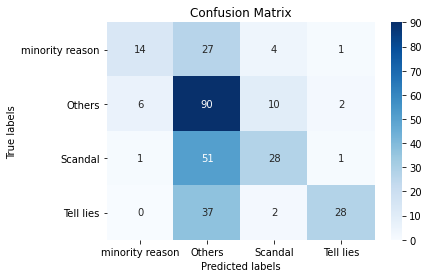

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_testpre,clf.predict(X_testpre)), cmap='Blues', annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['minority reason','Others','Scandal','Tell lies'])
ax.yaxis.set_ticklabels(['minority reason','Others','Scandal','Tell lies'],rotation=0)


#result

after selecting the best model on the training set, we choose logistic regression with WF.

***Describe the results of the analysis and discuss your interpretation of the results***




as we can see above the accuracy of the first model for predicting the sentiment of select-relating data is around 60%. When the model work on the training set the accuracy can reach 69.8%. The first reason causing this situation is that when we are doing the data preparation we choose the word whose WF is higher 50 as features and drop all the rest. Only 2000 unique words left. By doing this the crash is avoid while some useful information is lost either. The second reason is that the data set we choose to train and we choose to test is not exactly the same. Which means in the sentiment training set we do not 100% target on selection-sentiment analyzing. So perhaps the features we choose to do is not perfect match the test set and it causes decrease in accuracy.



(after trying a larger training set with 20000 data points, we found that the accuracy does not significant change , still around 60%, so we delete those cell, but it somehow prove that the sample size we choose is feasible and reasonable)

***how each party is viewed in the public eye***


First of all, the length of each tweet after cleaning. As we can see distribution above, it all seems to have a same trendm they all reach the peak at about len=3 then drop. The only different between negative and positive is the total number of each of them is a little different, but the distribution seems to be exactly the same.
There is also a 3rd class Neutral, the trend is also tends to be the same while there is another peak around len 1, perhaps because that the sample size is a little some and contains a little disturbance.

Second, in the eye of pubilc, All the three parties( which is 4 in above , we add NDP ), the positive sample in NDP seems much more than the negetive sample in NDP, which perhaops means that the NDP is friendly ?
And for the liber and NONE class, the postive sentiment takes about 50%  and the rest is nagetive. 
what we need to point out is that for the PPC, the public tends to be more friendly, as we can see there are 60% is postive with 40% is negative. perhaps guys think PPC will win the vote or PPC have a better reputation among the people.

***For the second model***

There are 2 reasons why the accuracy of the second model is relatively low. The first reason is that we just use the data after doing transform to train and test the model. We drop the word whose WF is lower than 50 which will cause information lossing in the process, especial the training set and the test set is one part of seletion set instead of sentiment set. The situation matching the sentiment set perhaps cant work well on the seletion set. The second reason is that the nagetive reason given by the dataset not not have a clear boundary. according to the confusion matrix we build in the last step, it can be showen clearly that all other class will be class into class "other". this perhaps because that when the data is collecting, any sample that can tell the reason will be put into class "other" and it cause that "other" class has various characteristic and cause a lot of noise for classification.  


***how to improve***

According to the 2 reasons stated before, for the second reason, it is caused by colletion of the data so perhaps there is not only one center in this class perhaps we can use mixture guassian distribution to improve this question. Then we focus on the first one. We can just use the selection dataset to do the vectorizer.fit_transform() instead of vectorizer.transform(). And do the feature selection again. By doing this we can create a model which is more matchable for the slection data.( what we apply now the result of doing feature selection on sentiment dataset) It can contains as much information as possible and will reduce the noise. And it can lead to a higher accuracy. 